# Importing Required Packages

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score
import json
import warnings
import os
import ast

sns.set()
warnings.filterwarnings("ignore")

# Importing Dataset

In [30]:
config_url = '../../hourlyAPI/config/coins/coins_to_track.json'
f = open(config_url)
tracked_coins = ast.literal_eval(json.load(f)['coins'])
f.close()
print(tracked_coins)

['DCR', 'CTSI', 'BTC', 'FTM', 'TRB', 'MANA', 'BAT', 'GXS', 'STORM', 'OMG', 'STMX', 'WAN', 'IOST', 'NMR', 'FET', 'ICX', 'MATIC', 'SKL', 'VET', 'KEEP', 'ALGO', 'DOGE', 'AXS', 'TRX', 'BNT', 'SAND', 'RUNE', 'HBAR', 'WAVES', 'FUN', 'ARPA', 'CREAM', 'ETH', 'DOCK', 'NEXO', 'SRM', 'LTO', 'ETC', 'BTS', 'DOT', 'VTH', 'EOS', 'ONT', 'AGLD', 'NKN', 'CRV', 'CELR', 'CRO', 'OCEAN', 'CAKE', 'MDX', 'CELO', 'SXP', 'RVN', 'QTUM', 'ZEC', 'AUDIO', 'ACH', 'AVAX', 'SUSHI', 'ANT', 'UMA', 'FIL', 'BAND', 'BEAM', 'ATOM', 'UNI', 'TOMO', 'ERD', 'ENJ', 'PERL', 'YFI', 'CHZ', 'FTT', 'SC', 'WBTC', 'API3', 'ZIL', 'BCH', 'CHR', 'AAVE', 'DENT', 'MKR', 'HT', 'REN', 'COTI', 'CEL', 'PNT', 'HIVE', '1INCH', 'HOT', 'AMP', 'LTC', 'ADA', 'SNX', 'IOTX', 'MITH', 'TFUEL', 'XMR', 'ARDR', 'RLY', 'PERP', 'LUNA', 'REQ', 'ZRX', 'NEO', 'MFT', 'WRX', 'HC', 'REEF', 'STORJ', 'NULS', 'BAL', 'STPT', 'SHIB', 'NANO', 'DASH', 'RLC', 'DATA', 'KSM', 'THETA', 'LINK', 'MTL', 'SOL', 'DGB', 'GRT', 'AION', 'XLM', 'COMP', 'DUSK', 'MTA', 'BNB', 'OGN', 'XT

In [31]:
tracked_coins = ["XEM","ZRX",
        "BTC","ETH","BNB","XRP","LTC","BCH","XLM","EOS",
        "LRC","MKR","BAT","ZIL",
        "RLC",
        "ATOM","ANT","ADA","CRO","XTZ","TRX","LINK","FTM",
        "ENJ","DOGE","MANA",
        "STMX","STORJ"]

In [32]:
def load_coin_dataset():
    url = '../statistical_models/coins_history_indicators.csv'
    start_train = "2019-07-01 01:00:00"
    df = pd.read_csv(url, sep="\t")
    df.set_index("Time", inplace = True)
    
    df.sort_index(inplace=True)
    df = df[start_train: df.index[-1]]

    return df

In [33]:
df = load_coin_dataset()

In [34]:
col_names_list = []
for coin in [tracked_coins[0]]:
    n_col = 0
    col = df.columns
    for c in col:
        if coin in c:
            col_names_list.append(c.replace(coin, ""))
            # print(c)
            n_col += 1
print(n_col)
print(col_names_list)

25
['', '_SMA_5', '_SMA_15', '_SMA_ratio', '_prev_close', '_Diff', '_Up', '_Down', '_avg_5up', '_avg_5down', '_avg_15up', '_avg_15down', '_RS_5', '_RS_15', '_RSI_5', '_RSI_15', '_RSI_ratio', '_5Ewm', '_15Ewm', '_MACD', '_15MA', '_SD', '_upperband', '_lowerband', '_RC']


In [35]:
df_2 = pd.DataFrame()
for coin in tracked_coins:
    df_2[[coin + x for x in col_names_list]] = df[[coin + x for x in col_names_list]]

In [36]:
print(df_2.values.shape)

(23022, 700)


In [37]:
from sklearn.model_selection import train_test_split

dataset = df_2.copy()
shift_window = 1

# integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(np.array(tracked_coins).reshape(-1,1))
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

# onehot_encoder = OneHotEncoder()
# onehot_encoder.fit(np.array(tracked_coins).reshape(-1, 1))


X = np.empty((0, n_col + 1))
X_encoded = np.empty((0, len(tracked_coins)))
Y = np.empty((0, 1))
i = 0
for coin in tracked_coins:
    # df_coin = dataset[[coin + x for x in col_names_list]]
    
    dataset[coin + '_log_diff'] = np.log(dataset[coin]).diff(1)
    # df_coin.dropna(inplace=True)
    delta = dataset[[coin]].values - dataset[[coin + '_prev_close']].values

    # X_coin = df_coin.values
    dataset[coin + '_output'] = np.where(delta > 0, 1, 0)

    # encoded_coin = label_encoder.transform(np.array([coin]).reshape(1,-1))
    # print(encoded_coin)
    # encoded_list = np.array([coin for val in range(len(X_coin))])
    # X_coin_encoded = onehot_encoder.transform(np.array(encoded_list).reshape(-1 ,1)).toarray()
    # print(X_coin_encoded)
    # X_coin_encoded = np.tile(X_coin_encoded, (len(X_coin), 1))
    # X_coin_encoded = np.array(X_coin_encoded)
    # print(X_coin_encoded.shape)
    # print(X_encoded.shape)

    # X_encoded = np.row_stack((X_encoded, X_coin_encoded))

    # X = np.concatenate([X, X_coin], axis=0)
    # Y = np.concatenate([Y, Y_coin], axis=0)
    # Y.append(Y_coin)
    i += 1


# X_ = [item for sublist in X for item in sublist]
# Y_ = [item for sublist in Y for item in sublist]
# X = np.array(X_)
# Y = np.array(Y_)
print('Dataset creation done')
print(dataset.values.shape)
# print(X.shape)
# print(Y.shape)
# print(X_encoded.shape)

Dataset creation done
(23022, 756)


In [26]:
for coin in tracked_coins:
    # print(coin, ' ', dataset[coin][0])
    print(coin, ' ', dataset[coin][-1])

XEM   0.1087
ZRX   0.5928
BTC   42207.03
ETH   2872.93
BNB   394.41
XRP   0.7956
LTC   124.62
BCH   324.11
XLM   0.2097
EOS   2.339
LRC   0.8983
MKR   1898.57
BAT   0.7919
ZIL   0.0471
RLC   1.95
ATOM   26.12
ANT   5.571
ADA   1.034
CRO   0.48
XTZ   3.788
TRX   0.06389
LINK   15.53
FTM   1.873
ENJ   1.719
DOGE   0.1464
MANA   2.778
STMX   0.01474
STORJ   1.118


In [28]:
for col in dataset.columns:
    print(col, ' ', dataset[col][0])

DCR   30.62
CTSI   nan
BTC   10898.54
FTM   0.02711
TRB   nan
MANA   0.05071
BAT   0.3239
GXS   2.093
STORM   0.002763
OMG   2.514
STMX   0.002763
WAN   0.359
IOST   0.01273
NMR   nan
FET   0.1551
ICX   0.3072
MATIC   nan
SKL   nan
VET   0.008349
KEEP   nan
ALGO   1.397
DOGE   0.003254
AXS   nan
TRX   0.03275
BNT   0.7241
SAND   nan
RUNE   nan
HBAR   nan
WAVES   1.928
FUN   0.005016
ARPA   nan
CREAM   nan
ETH   294.04
DOCK   0.01281
NEXO   0.1134
SRM   nan
LTO   0.1236
ETC   7.84
BTS   0.06238
DOT   nan
VTH   nan
EOS   5.89
ONT   1.453
AGLD   nan
NKN   nan
CRV   nan
CELR   0.01798
CRO   0.06387
OCEAN   nan
CAKE   nan
MDX   nan
CELO   nan
SXP   nan
RVN   0.05297
QTUM   5.098
ZEC   103.78
AUDIO   nan
ACH   nan
AVAX   nan
SUSHI   nan
ANT   0.5217
UMA   nan
FIL   nan
BAND   nan
BEAM   1.763
ATOM   5.534
UNI   nan
TOMO   nan
ERD   nan
ENJ   0.1231
PERL   nan
YFI   nan
CHZ   nan
FTT   nan
SC   0.00309
WBTC   nan
API3   nan
ZIL   0.01742
BCH   408.04
CHR   0.06975
AAVE   nan
DENT   0.001461
M

In [38]:
df = dataset.copy()

In [39]:
df.dropna(inplace=True, axis=0)
Y = np.empty((len(df), len(tracked_coins)))
i = 0
print(df.values.shape)
for coin in tracked_coins:
    # print(df[coin + '_output'].values.shape)
    # print(Y.shape)
    Y[:, i] = df[coin + '_output'].values
    df.drop(coin + '_output', inplace=True, axis=1)
    i += 1
X = df.values

(16212, 756)


In [40]:
print(X.shape)
# X = X[:, 0]
# X = X.reshape(-1,1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(16212, 728)
(16212, 728)


In [41]:
print(Y.shape)

(16212, 28)


In [42]:
# Initiaton value of lag
window = 10
# sliding windows function
def threeD_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps, :])
        
    return np.array(Xs), np.array(ys)

In [43]:
# Y = Y.reshape((-1,1))
X_3D, y = threeD_dataset(X_scaled, Y, window)
X_3D = np.reshape(X_3D, (X_3D.shape[0],X_3D.shape[1],X_3D.shape[2]))
print('3D Data done')

3D Data done


In [64]:
print(X_3D.shape)

X_train, X_test, y_train, y_test = train_test_split(X_3D, y, test_size=0.2, random_state=1, shuffle=False)
print('Test split done')


(16202, 10, 728)
Test split done


In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12961, 10, 728)
(12961, 28)
(3241, 10, 728)
(3241, 28)


In [73]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping

# The GRU architecture
modelGRU = Sequential()

modelGRU.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
modelGRU.add(Dropout(0.2))

# modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
# modelGRU.add(Dropout(0.2))

# modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
# modelGRU.add(Dropout(0.2))

modelGRU.add(LSTM(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=y_train.shape[-1], activation='softmax'))
# modelGRU.summary()

# Compiling the Gated Recurrent Unit
modelGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
import keras

# Fitting into data training and data validation
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

batch_size = 4
epoch = 20
pred = modelGRU.fit(X_train, y_train, validation_split = 0.2, batch_size=batch_size, epochs=epoch, callbacks = [early_stop], shuffle=False)

Epoch 1/20
1578/2592 [=================>............] - ETA: 8s - loss: 48.3519 - accuracy: 0.0114

KeyboardInterrupt: 

In [68]:
print(np.count_nonzero(y)/len(y))

12.9928403900753


In [69]:
scores = modelGRU.evaluate(X_test, y_test, verbose=0)
print(scores)

[46.347328186035156, 0.0024683738593012094]


In [70]:
predictions = modelGRU.predict(X_test)
preds = np.where(predictions > 0.5, 1, 0)
print(np.count_nonzero(preds)/len(predictions))

0.0


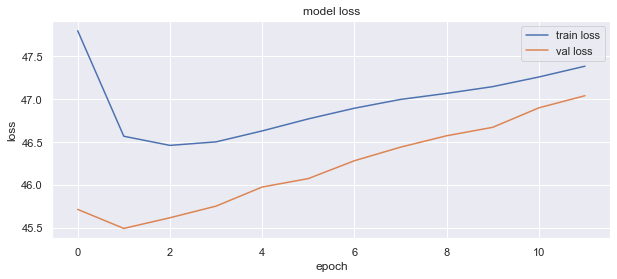

In [71]:
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

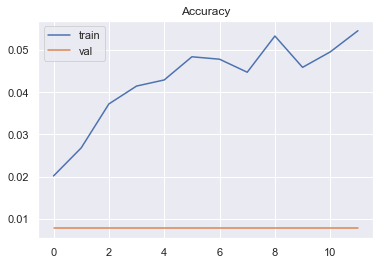

In [72]:
plt.title('Accuracy')
plt.plot(pred.history['accuracy'], label='train')
plt.plot(pred.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [135]:
def get_sarima_mape(df, coin):
    # coin_df = df
    coin_df = df.drop(df[df.index.hour != 0].index)
    coin_df.drop(coin_df[coin_df[coin + "_pred"].isna() != 0].index, inplace=True)
    mape = mean_absolute_percentage_error(y_true = coin_df[coin], 
                                      y_pred = coin_df[coin + "_pred"])
    # print('Mape for ', coin, ': ', mape)
    return mape

In [136]:
mape = {}
for coin in tracked_coins:
    mape_coin = get_sarima_mape(df, coin)
    mape[coin] = mape_coin

In [137]:
import statistics
sarima_mape = [x[-1] for x in mape.items()]
average_mape = statistics.fmean(sarima_mape)
print(average_mape)

0.014715068192098894


In [138]:
for coin in tracked_coins:

    df[coin + "_close_log_diff"] = np.log(df[coin]).diff(1)

    df[coin + "_20_SMA"] = df[coin + "_close_log_diff"].shift(1).rolling(window = 500, min_periods = 1).mean()
    df[coin + "_SMA_preds_exp"] = np.exp(df[coin + "_20_SMA"].values)
    df[coin + "_SMA_preds"] = df[coin + "_SMA_preds_exp"] * df[coin + "_1"]

In [142]:
def get_SMA_mape(df, coin):
    # coin_df = df
    coin_df = df.drop(df[df.index.hour != 0].index)
    coin_df.drop(coin_df[coin_df[coin + "_SMA_preds"].isna() != 0].index, inplace=True)
    mape = mean_absolute_percentage_error(y_true = coin_df[coin], 
                                      y_pred = coin_df[coin + "_SMA_preds"])
    # print('Mape for ', coin, ': ', mape)
    return mape

In [143]:
SMA_mape = {}
for coin in tracked_coins:
    SMA_mape_coin = get_SMA_mape(df, coin)
    SMA_mape[coin] = SMA_mape_coin
SMA_mape = [x[-1] for x in SMA_mape.items()]
average_SMA_mape = statistics.fmean(SMA_mape)
print(average_SMA_mape)

0.01449524146038071


In [144]:
def get_lag_mape(df, coin):
    # coin_df = df
    coin_df = df.drop(df[df.index.hour != 0].index)
    coin_df.drop(coin_df[coin_df[coin + "_1"].isna() != 0].index, inplace=True)
    mape = mean_absolute_percentage_error(y_true = coin_df[coin], 
                                      y_pred = coin_df[coin + "_1"])
    # print('Mape for ', coin, ': ', mape)
    return mape

In [145]:
lag_mape = {}
for coin in tracked_coins:
    lag_mape_coin = get_lag_mape(df, coin)
    lag_mape[coin] = lag_mape_coin
lag_mape = [x[-1] for x in lag_mape.items()]
average_lag_mape = statistics.fmean(lag_mape)
print(average_lag_mape)

0.014436160032555745


In [146]:
from sklearn.metrics import accuracy_score

def calculate_signal_accuracy(price_lag, close_price, prediction):

    delta_real = close_price - price_lag
    delta_prediction = prediction - price_lag

    signal_real = np.where(delta_real > 0, 1, 0)
    signal_prediction = np.where(delta_prediction > 0, 1, 0)
    accuracy = accuracy_score(signal_real, signal_prediction)

    return accuracy

In [147]:
df.head()

,DCR,CTSI,BTC,FTM,TRB,MANA,BAT,GXS,STORM,OMG,...,XEM_SMA_preds_exp,XEM_SMA_preds,KNC_close_log_diff,KNC_20_SMA,KNC_SMA_preds_exp,KNC_SMA_preds,LRC_close_log_diff,LRC_20_SMA,LRC_SMA_preds_exp,LRC_SMA_preds
Time,,,,,,,,,,,,,,,,,,,,,
2019-07-01 01:00:00,30.62,NaN,10898.54,0.02711,NaN,0.05071,0.3239,2.093,0.002763,2.514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 02:00:00,31.10,NaN,10999.70,0.02751,NaN,0.04994,0.3155,2.197,0.002851,2.541,...,NaN,NaN,0.003571,NaN,NaN,NaN,0.007667,NaN,NaN,NaN
2019-07-01 03:00:00,31.28,NaN,11085.91,0.02704,NaN,0.05379,0.3311,2.134,0.002935,2.575,...,1.005813,0.092233,0.009460,0.003571,1.003577,0.253403,0.004536,0.007667,1.007697,0.055413
2019-07-01 04:00:00,31.25,NaN,11086.59,0.02757,NaN,0.04949,0.3305,2.125,0.002827,2.557,...,1.003285,0.092071,0.000784,0.006515,1.006537,0.256566,0.020427,0.006102,1.006120,0.055578
2019-07-01 05:00:00,31.16,NaN,11013.00,0.02739,NaN,0.04945,0.3247,2.120,0.002802,2.516,...,1.009740,0.094774,-0.007476,0.004605,1.004616,0.256277,-0.010878,0.010877,1.010936,0.056997


In [152]:
total_accuracy_lag = []
total_accuracy_SMA = []
total_accuracy_SARIMAX = []
df_accuracy = pd.DataFrame(columns=["accuracy_lag", "accuracy_SMA", "accuracy_SARIMAX","starting_on"], index=tracked_coins)

for coin in tracked_coins:

    coin_df = df.copy()

    coin_df.drop(coin_df[coin_df.index.hour != 0].index, inplace=True)
    coin_df.drop(coin_df[coin_df[coin + "_pred"].isna() != 0].index, inplace=True)

    accuracy_lag = calculate_signal_accuracy(coin_df[coin + "_1"], coin_df[coin], coin_df[coin + "_1"])
    accuracy_SMA = calculate_signal_accuracy(coin_df[coin + "_1"], coin_df[coin], coin_df[coin + "_SMA_preds"])
    accuracy_SARIMAX = calculate_signal_accuracy(coin_df[coin + "_1"], coin_df[coin], coin_df[coin + "_pred"])

    total_accuracy_lag.append(accuracy_lag)
    total_accuracy_SMA.append(accuracy_SMA)
    total_accuracy_SARIMAX.append(accuracy_SARIMAX)

    df_accuracy["accuracy_lag"][coin] = accuracy_lag
    df_accuracy["accuracy_SMA"][coin] = accuracy_SMA
    df_accuracy["accuracy_SARIMAX"][coin] = accuracy_SARIMAX
    df_accuracy["starting_on"][coin] = coin_df.index[0]

df_accuracy.to_csv('accuracy_scores.csv', sep=";", encoding="UTF-8")

In [153]:
print('Toal accuracy based on lag prediction: ', 100*statistics.fmean(total_accuracy_lag),'%')
print('Signal accuracy based on moving average prediction: ', 100*statistics.fmean(total_accuracy_SMA),'%')
print('Signal accuracy based on SARIMAX prediction: ', 100*statistics.fmean(total_accuracy_SARIMAX),'%')

Toal accuracy based on lag prediction:  52.82260199426096 %
Signal accuracy based on moving average prediction:  49.21690422948008 %
Signal accuracy based on SARIMAX prediction:  51.17182633042287 %
